# Matplotlib: Intro


* Matplotlib è una libreria per la creazione di visualizzazioni statiche, interattive e animate in Python.
* Alcuni dei principali tipi di grafici disponibili in Matplotlib sono: grafici a linee, a barre, a dispersione (scatter), istogrammi e grafici a torta, insieme a molti altri.
* È altamente personalizzabile e può essere utilizzata per creare grafici complessi sovrapponendo diversi elementi.

### Importanza

* Matplotlib è fondamentale per l’analisi dei dati: offre un modo per visualizzare dati e intuizioni in formato grafico.
* Facilita la comprensione dei dati attraverso la rappresentazione visiva, rendendo più semplice individuare pattern, tendenze e anomalie.
* Supporta un'ampia gamma di grafici e visualizzazioni, inclusi grafici 3D e grafici interattivi per analisi approfondite.
* Si integra con Pandas e NumPy, rendendo facile passare dalla manipolazione dei dati alla visualizzazione.

### Importazione

* Per utilizzare Matplotlib, è necessario importarla, solitamente insieme a Pyplot, che è il modulo per la creazione dei grafici.
* La convenzione comune è importare `matplotlib.pyplot` come `plt`, semplificando il riferimento al modulo nel codice.
* Si può fare anche da terminale: `conda install matplotlib`

Puoi consultare la documentazione ufficiale sui grafici [qui](https://matplotlib.org/stable/plot_types/index.html).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # si importa con il l'alias plt

### "Plottare" una linea

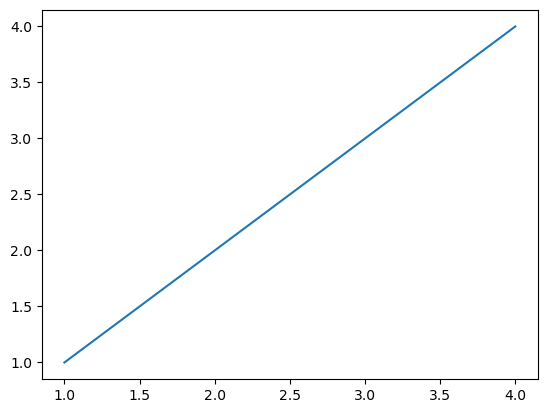

In [2]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x, y)

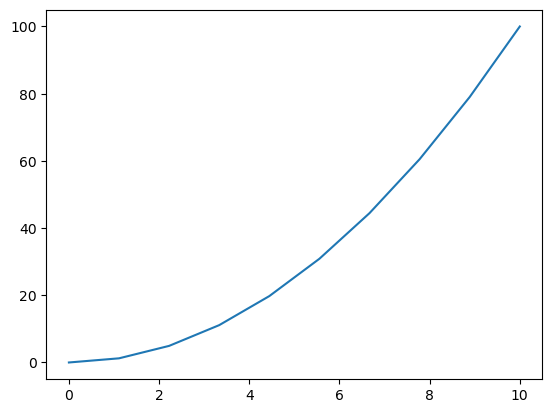

In [4]:
# Grafico a Linee
x = np.linspace(0, 10, 10)
y = [value**2 for value in x]

plt.plot(x, y)

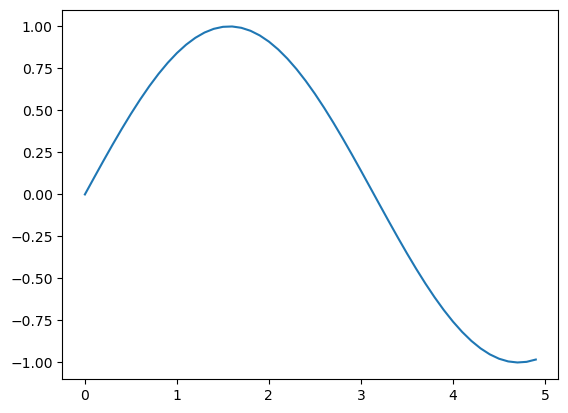

In [ ]:
x = np.arange(0,5,0.1)
y = np.sin(x)
plt.plot(x,y)

## Grafici a Barre

* Utilizzati per confrontare diversi gruppi o per monitorare cambiamenti nel tempo.
* Ideali per il confronto di dati categoriali.
* In Python abbiamo due tipi di grafici a barre:
    1. Grafici a Barre Verticali (*Bar Plots*) - le barre sono verticali
    2. Grafici a Barre Orizzontali (*Horizontal Bar Plots*) - le barre sono orizzontali


### Grafico a Barre Verticali

* `plt.bar()` per creare grafici a barre verticali.
* Sintassi: `plt.bar(categorie, valori)`
* Le barre sono verticali.


<BarContainer object of 4 artists>

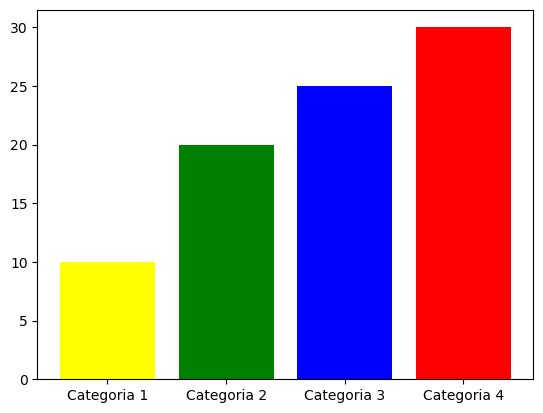

In [7]:
# Grafico a barre
categorie = ['Categoria 1', 'Categoria 2', 'Categoria 3', 'Categoria 4']
valori = [10, 20, 25, 30]
plt.bar(categorie, valori, color= ['yellow', 'green', 'blue', 'red'])


### Grafico a Barre Orizzontali

* È simile a un grafico a barre, ma le barre sono orizzontali.
* Anche la sintassi è simile: `plt.barh(categorie, valori)`.
* È utile quando le etichette del grafico sono lunghe (come nel nostro esempio precedente).
* Ottimo per confrontare la dimensione delle categorie o quando le etichette di testo sono troppo lunghe per stare bene sotto una barra verticale.

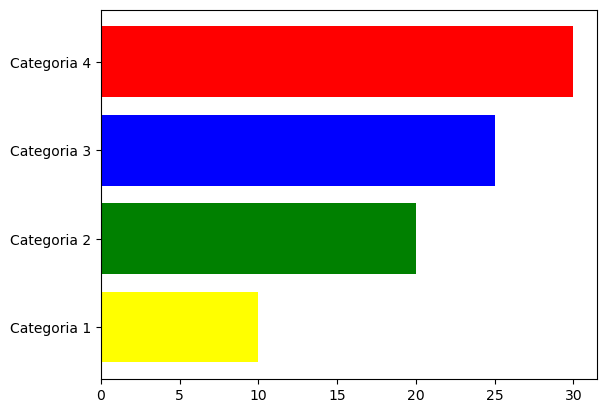

In [8]:
plt.barh(categorie, valori, color= ['yellow', 'green', 'blue', 'red'])
plt.show()

### Nota - `plt.show()`

* Potresti vedere `plt.show()` alla fine di alcuni grafici, ma **non è necessario** nei Jupyter Notebook [secondo la documentazione](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html)

Nei Jupyter Notebook, la visualizzazione del grafico avviene automaticamente.
Se lo usi scompare la scritta `[<matplotlib.lines.Line2D at 0x156ccfc80>]`

!!! È necessario però negli script python.


## Matplotlib Labeling (le ettichette)

Qui sotto trovi alcune funzioni di base per aggiungere etichette a un grafico:

* `title()` - Imposta un titolo per il grafico
* `xlabel()` - Imposta l’etichetta dell’asse x
* `ylabel()` - Imposta l’etichetta dell’asse y
* `xticks()` - Personalizza l’asse x
    * `rotation` - ruota l’etichetta di un certo numero di gradi, ad esempio `plt.xticks(rotation=45)` per ruotare le etichette dell’asse x di 45 gradi
* `yticks()` - Personalizza l’asse y


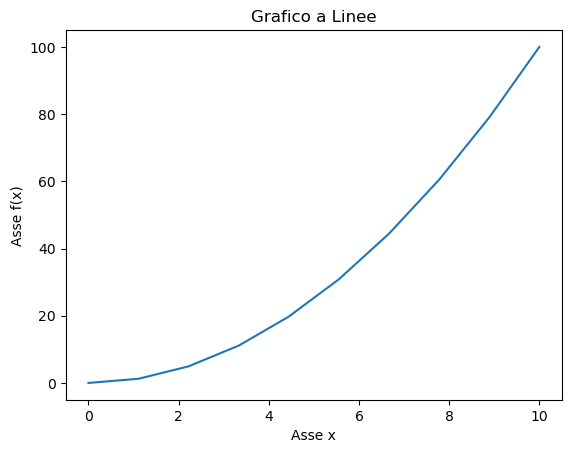

In [ ]:
# Grafico a Linee
x = np.linspace(0, 10, 10)
y = [value**2 for value in x]

plt.plot(x, y)
plt.title('Grafico a Linee')
plt.xlabel('Asse x')
plt.ylabel('Asse f(x)')
plt.show()

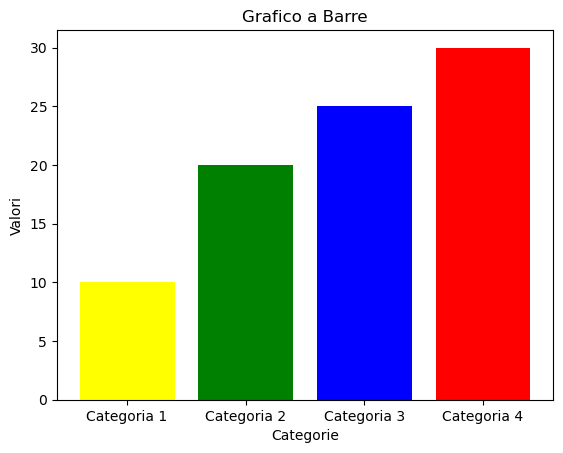

In [9]:
# Grafico a barre
categorie = ['Categoria 1', 'Categoria 2', 'Categoria 3', 'Categoria 4']
valori = [10, 20, 25, 30]

plt.bar(categorie, valori, color= ['yellow', 'green', 'blue', 'red'])

plt.title('Grafico a Barre')
plt.xlabel('Categorie')
plt.ylabel('Valori')
plt.show()


# Matplotlib e Panda

In [20]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  # we will use this for plotting

# Carica il dataset
dataset = load_dataset("yiqing111/Engineering_Jobs_Insight_Dataset")

# Converte in DataFrame Pandas
df = dataset['train'].to_pandas()
# Rimpiazza gli spazi con l'underscore
df.columns = df.columns.str.replace(' ', '_')
# Trasformo le date in formaro date time
df['Date_Posted'] = pd.to_datetime(df['Date_Posted'], errors='coerce')

Repo card metadata block was not found. Setting CardData to empty.


In [14]:
df['Date_Posted'] = df['Date_Posted'].dt.date
date_counts = df['Date_Posted'].value_counts()
date_counts = date_counts.sort_index()
date_counts

Date_Posted
2019-06-19      3
2019-08-19      1
2019-11-02      2
2019-11-13      1
2021-02-19      1
             ... 
2024-11-20    344
2024-11-21    337
2024-11-22    309
2024-11-23    362
2024-11-24    139
Name: count, Length: 431, dtype: int64

### NOTA - `Series`

Questo `date_counts` è un oggetto di tipo `Series` e **NON** un `DataFrame`, quindi si comporta in modo diverso rispetto a un DataFrame.

Possiamo accedere ai valori di un oggetto `Series` passando l'intera `Series` oppure specificando `Series.values`.


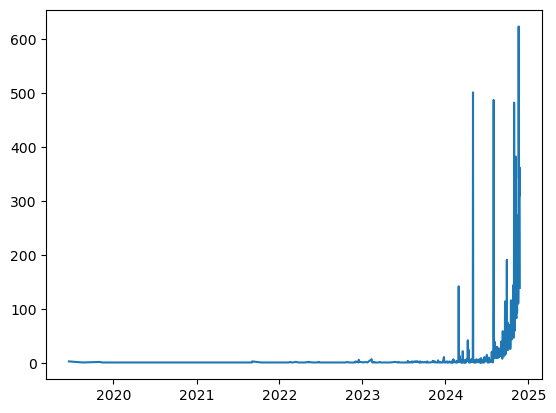

In [18]:
plt.plot(date_counts.index, date_counts.values)

È un gran casino...

Dobbiamo estrarre il mese utilizzando l’accessor `dt` e l’attributo `.month` dalla colonna `Date_Posted`.


In [21]:
df['job_posted_month'] = df['Date_Posted'].dt.month

# Group by 'month' and count the job postings
monthly_counts = df['job_posted_month'].value_counts()

# Sort the months
monthly_counts = monthly_counts.sort_index()

monthly_counts 

job_posted_month
1       32
2      202
3      117
4      163
5      582
6      119
7      314
8     1116
9     1165
10    2493
11    4837
12      45
Name: count, dtype: int64

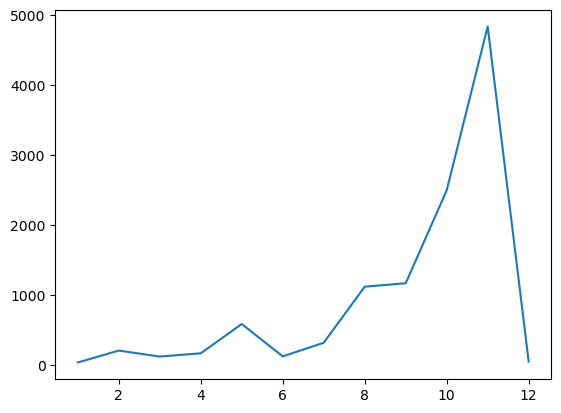

In [22]:
plt.plot(monthly_counts.index, monthly_counts)

In [23]:
# Ottieni il conteggio dei valori dei titoli di lavoro per il DataFrame filtrato
job_counts = df['Job_Title'].value_counts()

job_counts

Job_Title
Software Engineer                                                     311
Product Manager  Social app startup                                   282
Associate Product Manager  Social app startup                         277
2025 Virtual Summer Intern Program - Product Analyst Intern (Xome)    267
Real-Time Software Engineer                                           266
                                                                     ... 
Business Analyst Intern SC                                              1
Technical Business Analyst TX                                           1
HRIS Business Analyst FL                                                1
Business Analyst II TX                                                  1
Backend Developer - Java JVM Blockchain                                 1
Name: count, Length: 4848, dtype: int64

Text(0.5, 1.0, 'Job Postings by Job Title')

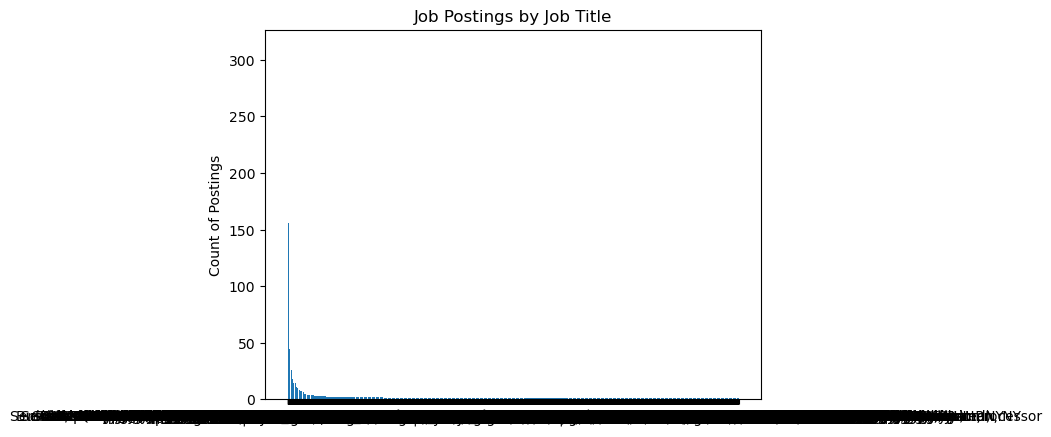

In [24]:
plt.bar(job_counts.index, job_counts)  
plt.ylabel('Count of Postings') # no xlabel required as I feel it's self explanatory
plt.title('Job Postings by Job Title')

In [25]:
# Get the value counts of the job titles for the filtered DataFrame
job_counts = df['Job_Title'].value_counts()
job_counts = job_counts.head(6)
job_counts = job_counts.sort_values(ascending=True)

job_counts

Job_Title
Data Science Internship (Remote Eligible) - Graduate Student Preferred    255
Real-Time Software Engineer                                               266
2025 Virtual Summer Intern Program - Product Analyst Intern (Xome)        267
Associate Product Manager  Social app startup                             277
Product Manager  Social app startup                                       282
Software Engineer                                                         311
Name: count, dtype: int64

Usate le parentesi per una visualizzazione più chiara

In [26]:
job_counts = (
    df['Job_Title']
    .value_counts()
    .head(6)
    .sort_values(ascending=True)
)

job_counts

Job_Title
Data Science Internship (Remote Eligible) - Graduate Student Preferred    255
Real-Time Software Engineer                                               266
2025 Virtual Summer Intern Program - Product Analyst Intern (Xome)        267
Associate Product Manager  Social app startup                             277
Product Manager  Social app startup                                       282
Software Engineer                                                         311
Name: count, dtype: int64

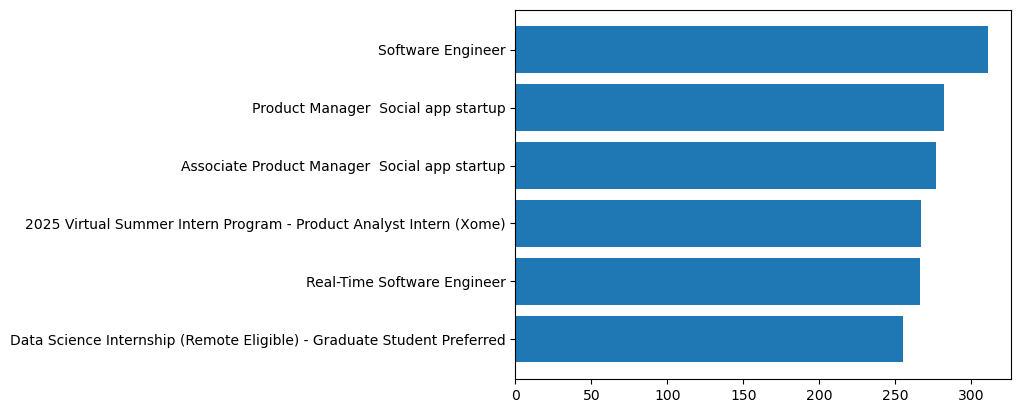

In [27]:
plt.barh(job_counts.index, job_counts)  # Changed this to be a horizontal bar chart instead
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Data Science Internship (Remote Eligible) - Graduate Student Preferred'),
  Text(1, 0, 'Real-Time Software Engineer'),
  Text(2, 0, '2025 Virtual Summer Intern Program - Product Analyst Intern (Xome)'),
  Text(3, 0, 'Associate Product Manager  Social app startup'),
  Text(4, 0, 'Product Manager  Social app startup'),
  Text(5, 0, 'Software Engineer')])

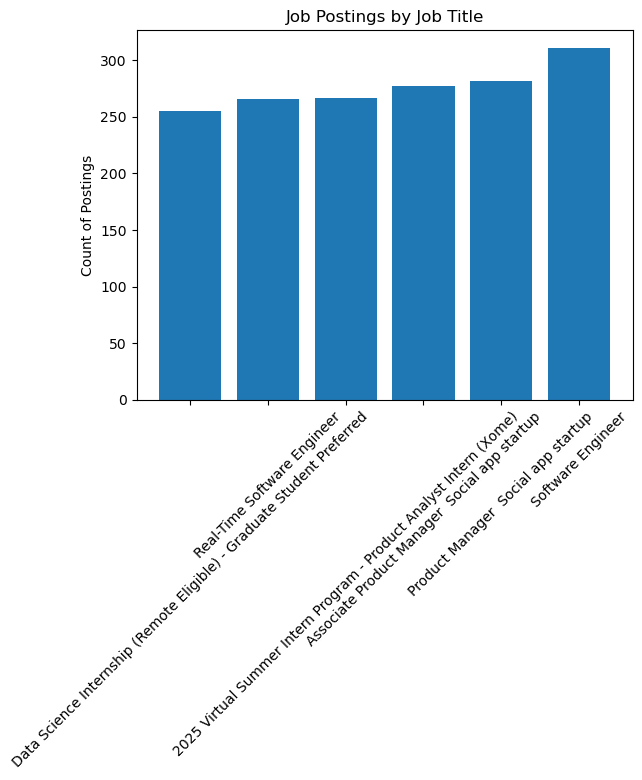

In [28]:
plt.bar(job_counts.index, job_counts)  
plt.ylabel('Count of Postings') # no xlabel required as I feel it's self explanatory
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45) 

Le etichette dell’asse x sono tutte disallineate, sistemiamole utilizzando gli argomenti `ha` e `va` nel metodo `.xticks()`.

- `ha='right'`: allinea il bordo destro dell’etichetta con il segno di graduazione, compensando la rotazione e aiutando a centrare meglio l’etichetta.
- `va='top'`: regola l’allineamento verticale per mantenere il testo sopra il segno di graduazione, evitando che si sovrapponga all’asse x.


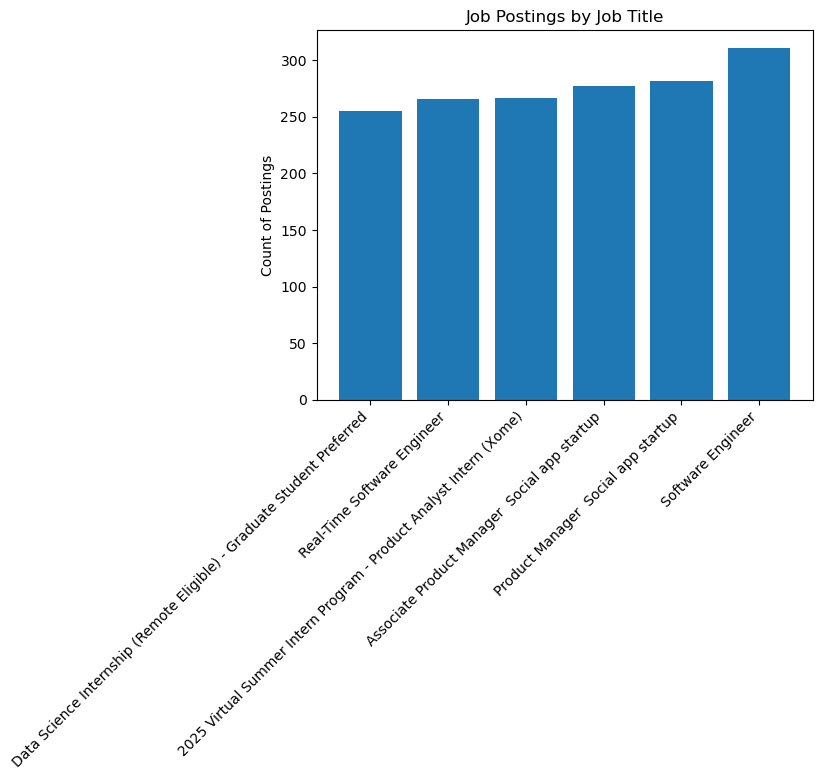

In [29]:
plt.bar(job_counts.index, job_counts)  
plt.ylabel('Count of Postings')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right') 
plt.show()

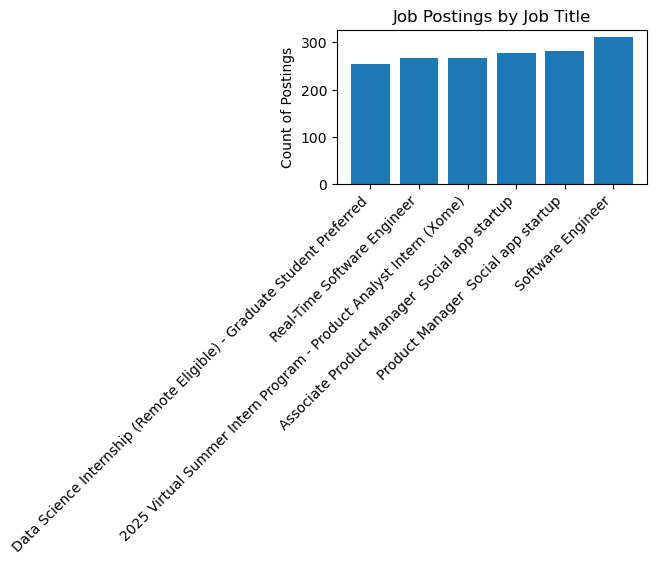

In [21]:
plt.figure(figsize=(4, 2))  # riduce la dimensione rispetto al default
plt.bar(job_counts.index, job_counts)  
plt.ylabel('Count of Postings')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right') 
plt.show()
